In [ ]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bases de datos ia/BTCUSDT3.csv")
df

,Date,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
51872,2023-07-23 20:00:00,30093.12,30143.50,30093.12,30143.49,686.239380
51873,2023-07-23 21:00:00,30143.49,30143.50,29920.37,29955.24,1001.862880
51874,2023-07-23 22:00:00,29955.24,30042.58,29944.60,30013.59,539.561210
51875,2023-07-23 23:00:00,30013.60,30097.49,30013.59,30083.75,527.321880


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51877 entries, 0 to 51876
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    51877 non-null  object 
 1   Open    51877 non-null  float64
 2   High    51877 non-null  float64
 3   Low     51877 non-null  float64
 4   Close   51877 non-null  float64
 5   Volume  51877 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.4+ MB


In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,51877.0,20052.248506,16080.572258,2870.9,7603.440000,11653.26000,29937.280000,68635.1200
High,51877.0,20160.976266,16169.458217,2950.0,7647.790000,11710.00000,30057.510000,69000.0000
Low,51877.0,19936.785302,15986.514222,2817.0,7555.000000,11586.21000,29846.380000,68451.1900
Close,51877.0,20052.736496,16080.486318,2919.0,7604.980000,11654.76000,29938.480000,68633.6900
Volume,51877.0,3183.054618,4457.441405,0.0,1006.864347,1758.20158,3458.822707,137207.1886


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Hour']=df['Date'].apply(lambda date:date.hour)
df['Day']=df['Date'].apply(lambda date:date.day)
df['Month']=df['Date'].apply(lambda date:date.month)
df['Year']=df['Date'].apply(lambda date:date.year)
df = df.drop('Date',axis=1)
df

,Open,High,Low,Close,Volume,Hour,Day,Month,Year
0,4261.48,4313.62,4261.32,4308.83,47.181009,4,17,8,2017
1,4308.83,4328.69,4291.37,4315.32,23.234916,5,17,8,2017
2,4330.29,4345.45,4309.37,4324.35,7.229691,6,17,8,2017
3,4316.62,4349.99,4287.41,4349.99,4.443249,7,17,8,2017
4,4333.32,4377.85,4333.32,4360.69,0.972807,8,17,8,2017
...,...,...,...,...,...,...,...,...,...
51872,30093.12,30143.50,30093.12,30143.49,686.239380,20,23,7,2023
51873,30143.49,30143.50,29920.37,29955.24,1001.862880,21,23,7,2023
51874,29955.24,30042.58,29944.60,30013.59,539.561210,22,23,7,2023
51875,30013.60,30097.49,30013.59,30083.75,527.321880,23,23,7,2023


<Axes: title={'center': 'corr. Pearson'}>

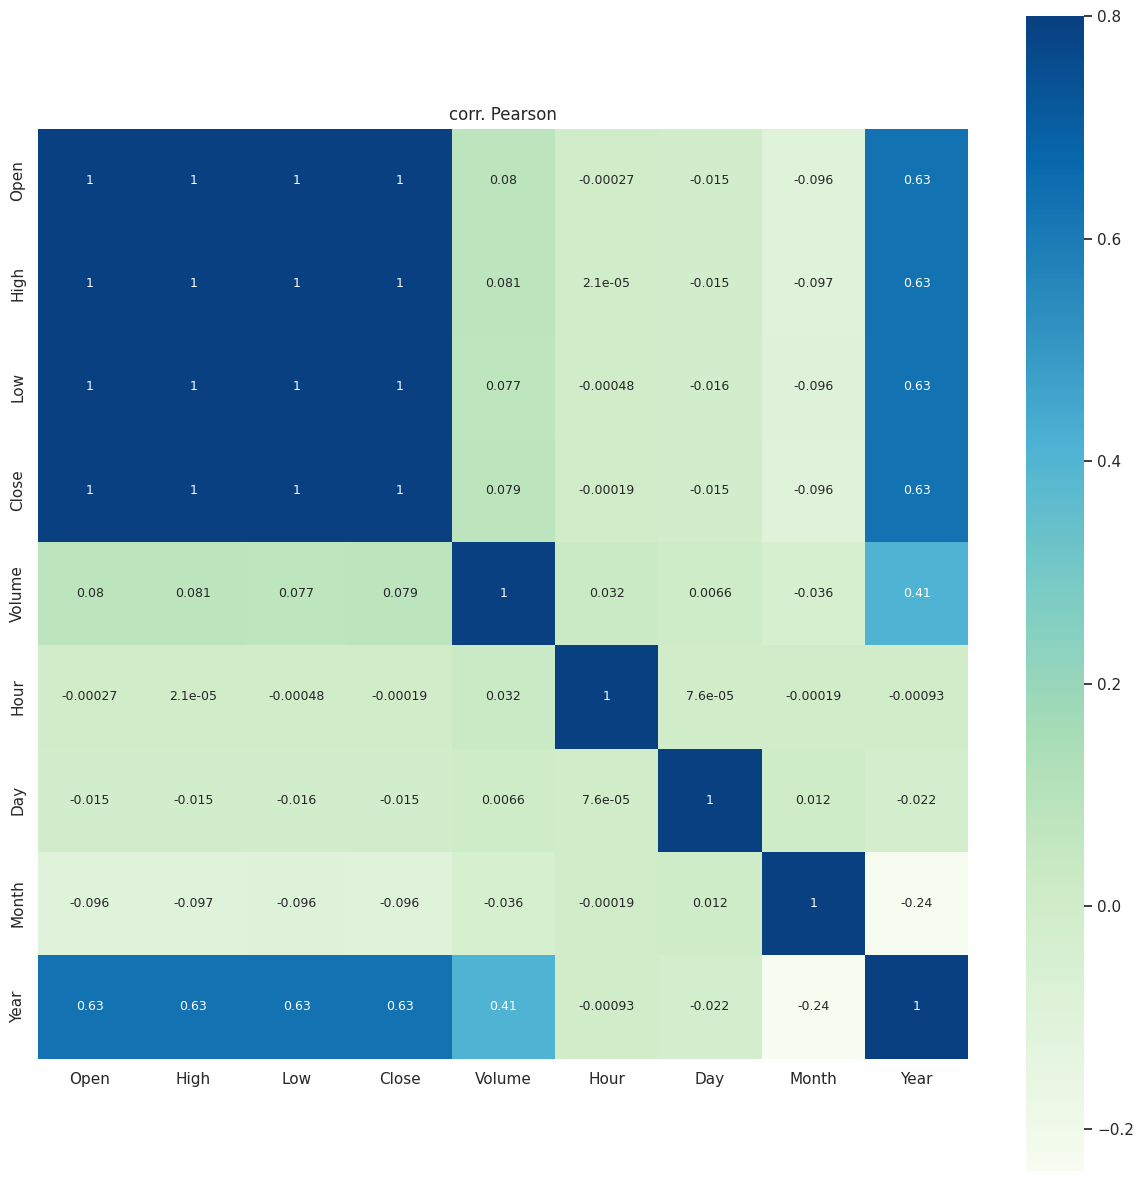

In [ ]:
from sqlalchemy import true
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title("corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,square=True,cmap="GnBu",linecolor='r',annot=True,annot_kws={'size':9})

In [ ]:
df = df.drop('Open',axis=1)
df = df.drop('High',axis=1)
df = df.drop('Low',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51877 entries, 0 to 51876
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   51877 non-null  float64
 1   Volume  51877 non-null  float64
 2   Hour    51877 non-null  int64  
 3   Day     51877 non-null  int64  
 4   Month   51877 non-null  int64  
 5   Year    51877 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.4 MB


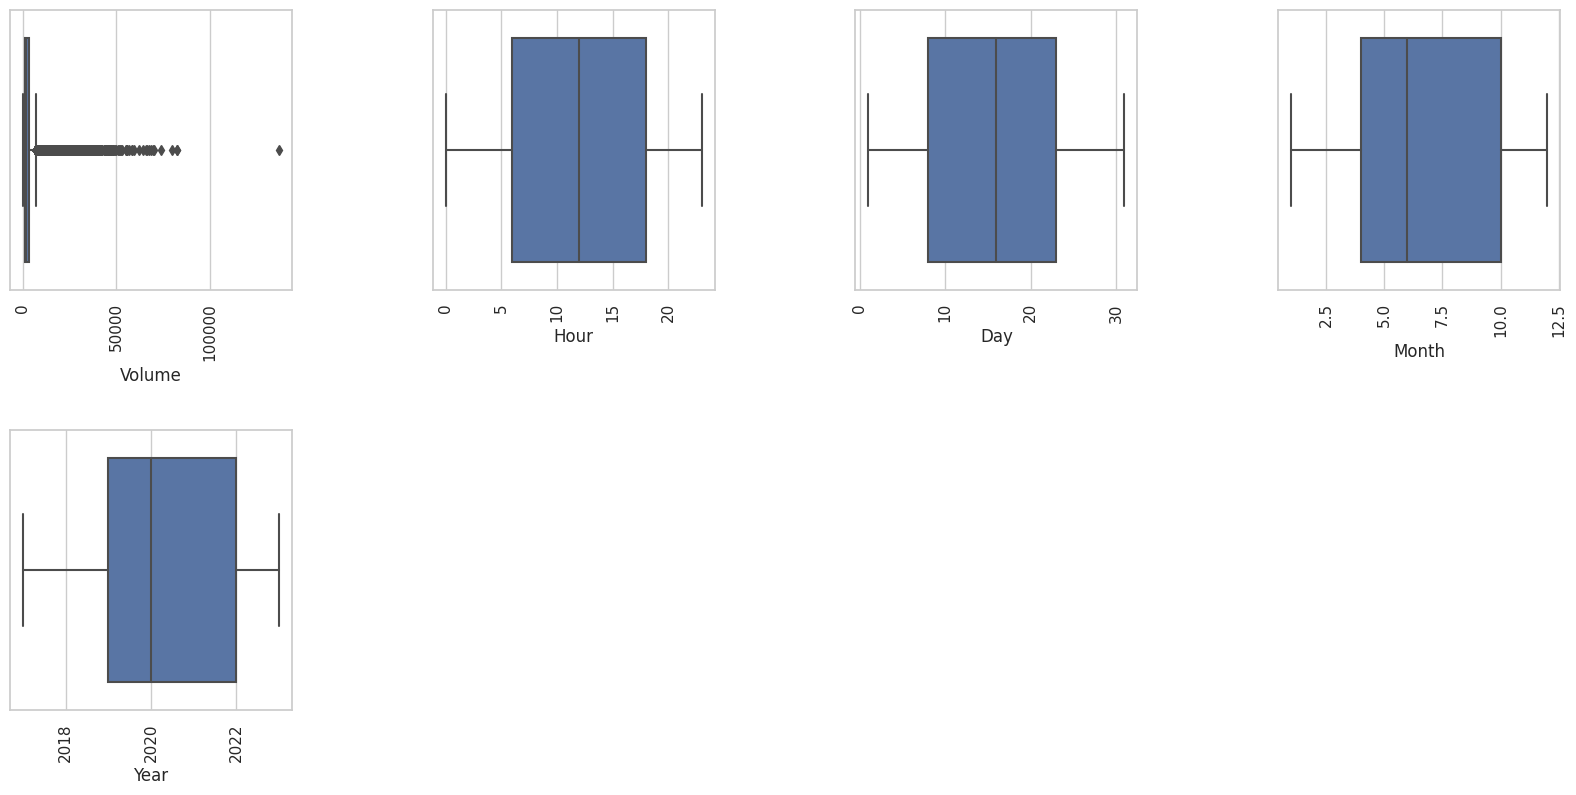

In [ ]:
plt.figure(figsize=(20, 20))
col = df.columns[:]
col=col.drop('Close')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in enumerate(col):
    plt.subplot(4, 4, i[0] + 1)
    sns.boxplot(x=i[1], data=df)
    plt.xticks(rotation=90)


In [ ]:
for i in col:
 q1= df[i].quantile(0.05)
 q4= df[i].quantile(0.95)
 df[i][df[i]<=q1]=q1
 df[i][df[i]>=q4]=q4


<ipython-input-52-b22889e1aafc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-52-b22889e1aafc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4
<ipython-input-52-b22889e1aafc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-52-b22889e1aafc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

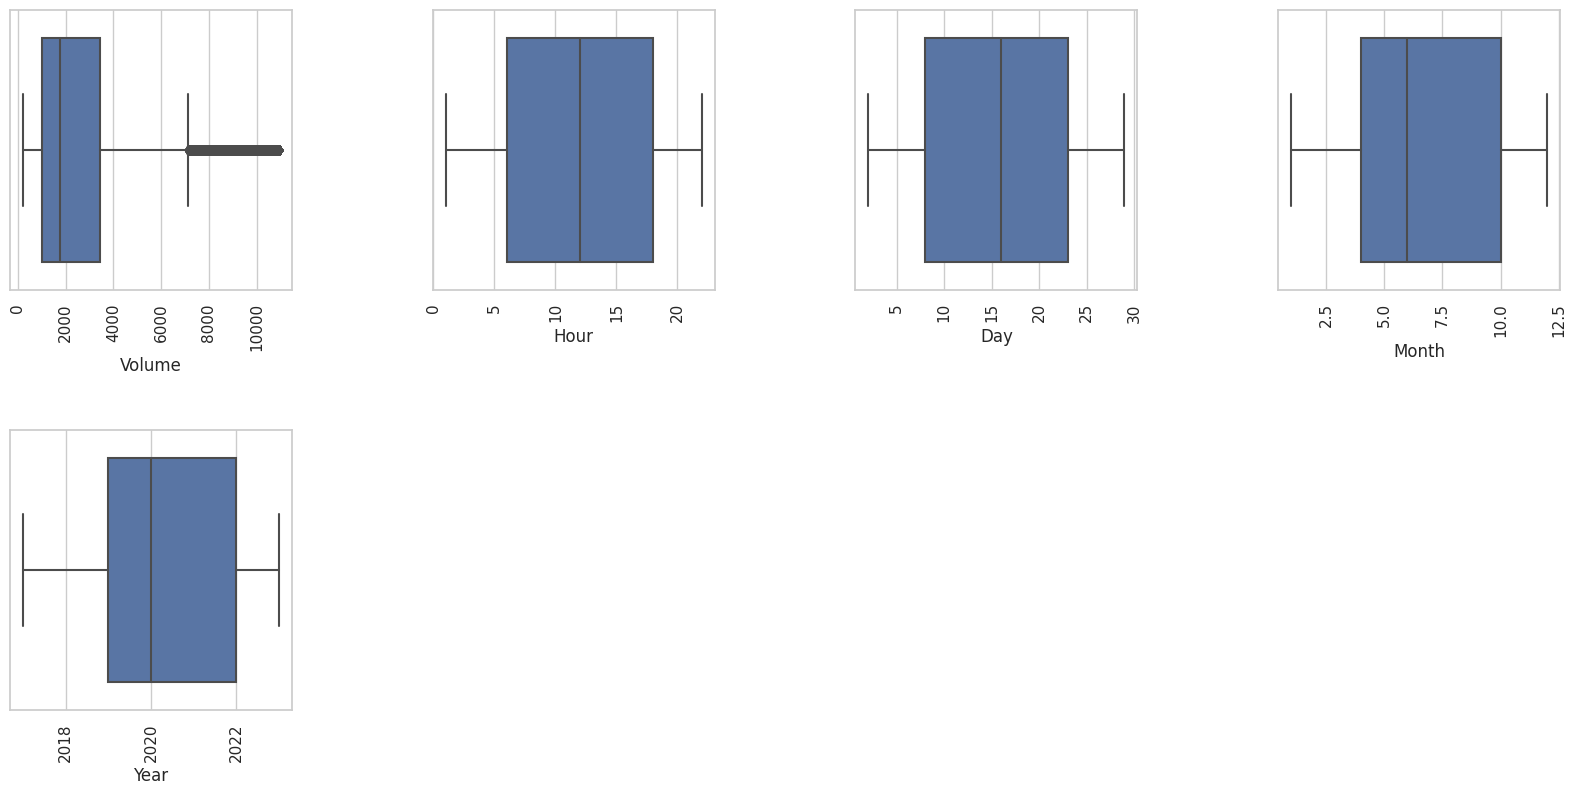

In [ ]:
plt.figure(figsize=(20, 20))
col = df.columns[:]
col=col.drop('Close')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in enumerate(col):
    plt.subplot(4, 4, i[0] + 1)
    sns.boxplot(x=i[1], data=df)
    plt.xticks(rotation=90)

In [ ]:
X=df.drop(['Close'],axis=1)
y=df['Close']
X

,Volume,Hour,Day,Month,Year
0,205.20761,4,17,8,2017
1,205.20761,5,17,8,2017
2,205.20761,6,17,8,2017
3,205.20761,7,17,8,2017
4,205.20761,8,17,8,2017
...,...,...,...,...,...
51872,686.23938,20,23,7,2023
51873,1001.86288,21,23,7,2023
51874,539.56121,22,23,7,2023
51875,527.32188,22,23,7,2023


array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

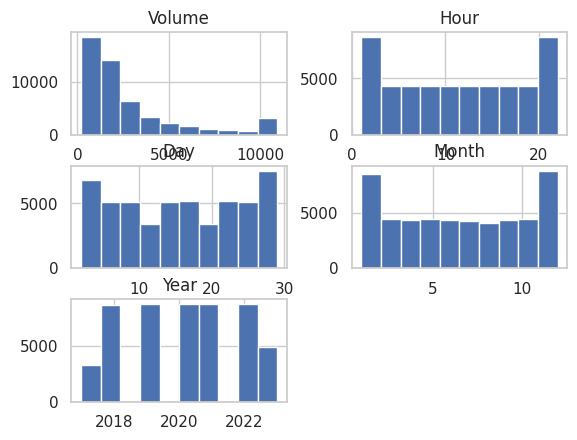

In [ ]:
X.hist()

In [ ]:
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X)
X_scaler = scalerMinMax.transform(X)

In [ ]:
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_scaler,y,random_state=500,test_size=0.3)

In [ ]:
optimizador = SGD(learning_rate=0.0001, momentum=0.66)
modelANN= Sequential()
modelANN.add(Dense(50,activation='relu'))
modelANN.add(Dense(25,activation='relu'))
modelANN.add(Dense(10,activation='relu'))
modelANN.add(Dense(1))
modelANN.compile(optimizer="adam",loss="mse")

In [ ]:
modelANN.fit(x=X_ros_train,y=y_ros_train,validation_data=(X_ros_test,y_ros_test),batch_size=400,
        epochs=1000,verbose=1)

Epoch 1/1000
91/91 [==============================] - 1s 4ms/step - loss: 660972672.0000 - val_loss: 659045184.0000
Epoch 2/1000
91/91 [==============================] - 0s 3ms/step - loss: 658050688.0000 - val_loss: 651379136.0000
Epoch 3/1000
91/91 [==============================] - 0s 3ms/step - loss: 637270592.0000 - val_loss: 611115904.0000
Epoch 4/1000
91/91 [==============================] - 0s 3ms/step - loss: 566447680.0000 - val_loss: 505685184.0000
Epoch 5/1000
91/91 [==============================] - 0s 3ms/step - loss: 432416768.0000 - val_loss: 354566496.0000
Epoch 6/1000
91/91 [==============================] - 0s 3ms/step - loss: 299157504.0000 - val_loss: 258033776.0000
Epoch 7/1000
91/91 [==============================] - 0s 3ms/step - loss: 245721296.0000 - val_loss: 239275328.0000
Epoch 8/1000
91/91 [==============================] - 0s 5ms/step - loss: 237630912.0000 - val_loss: 235777248.0000
Epoch 9/1000
91/91 [==============================] - 0s 4ms/step - loss

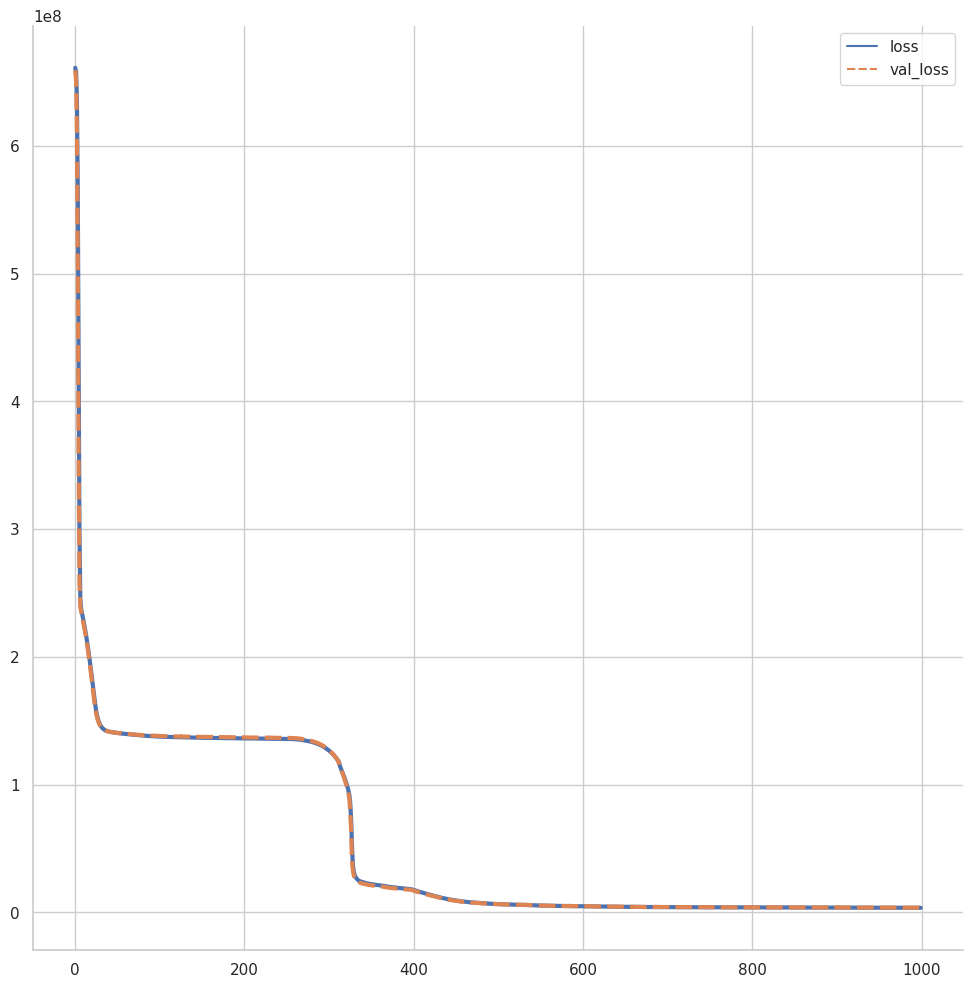

In [ ]:
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_predict_test = modelANN.predict(X_ros_test)
errorAbsoluto = mean_absolute_error(y_ros_test,y_predict_test)
print(errorAbsoluto)


487/487 [==============================] - 1s 1ms/step
1294.138852260475


In [ ]:
y_predict_train = modelANN.predict(X_ros_train)
errorAbsoluto = mean_absolute_error(y_ros_train,y_predict_train)
print(errorAbsoluto)

1135/1135 [==============================] - 1s 1ms/step
1287.9185790468352


In [ ]:
df

,Close,Volume,Hour,Day,Month,Year
0,4308.83,205.20761,4,17,8,2017
1,4315.32,205.20761,5,17,8,2017
2,4324.35,205.20761,6,17,8,2017
3,4349.99,205.20761,7,17,8,2017
4,4360.69,205.20761,8,17,8,2017
...,...,...,...,...,...,...
51872,30143.49,686.23938,20,23,7,2023
51873,29955.24,1001.86288,21,23,7,2023
51874,30013.59,539.56121,22,23,7,2023
51875,30083.75,527.32188,22,23,7,2023


In [ ]:
BTC1= df.drop('Close',axis=1).iloc[51875]
BTC1

Volume     527.32188
Hour        22.00000
Day         23.00000
Month        7.00000
Year      2023.00000
Name: 51875, dtype: float64

In [ ]:
btc1_escalado = scalerMinMax.transform(BTC1.values.reshape(-1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
btc1_escalado

array([[0.03000025, 1.        , 0.77777778, 0.54545455, 1.        ]])

In [ ]:
price_predict=modelANN.predict(btc1_escalado)[0,0]
price_predict

1/1 [==============================] - 0s 31ms/step


26849.424

In [ ]:
modelANN.save('modelo.h5')

In [ ]:
joblib.dump(scalerMinMax, "scaler.pkl")

['scaler.pkl']

In [ ]:
joblib.dump(errorAbsoluto, "errorAbsoluto.pkl")

['errorAbsoluto.pkl']